# 画像の傾きを補正する

スキャン時に少し傾けてスキャンしてしまった画像があるとする。

画像の分析の前処理として、画像の傾きを水平に直してから処理したい…という状況を想定する

## 表がある場合

スキャンした画像が会計の資料などで表が中心の画像だと、表の直線を検知して傾きを計算するのがよさそう

1. cannyでエッジを推定
2. ハフ変換で表の直線を推定
3. 直線の角度を計算
4. 補正すべき角度を計算
5. 回転して補正

### Canny

[OpenCV: Canny Edge Detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)


### ハフ変換

- [OpenCV: Hough Line Transform](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)
- [ハフ変換 (Hough Transform) による直線・円の検出 | CVMLエキスパートガイド](https://cvml-expertguide.net/terms/cv/image-feature-detection/hough-transform/)
- [ハフ変換による直線検出 — OpenCV-Python Tutorials 1 documentation](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

### 回転

[OpenCV: Affine Transformations](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html)

```python
import cv2
edge = cv2.Canny()
lines = cv2.HoughLinesP(edge, rho=1, theta = np.pi/180)
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
```

### サンプル画像の生成


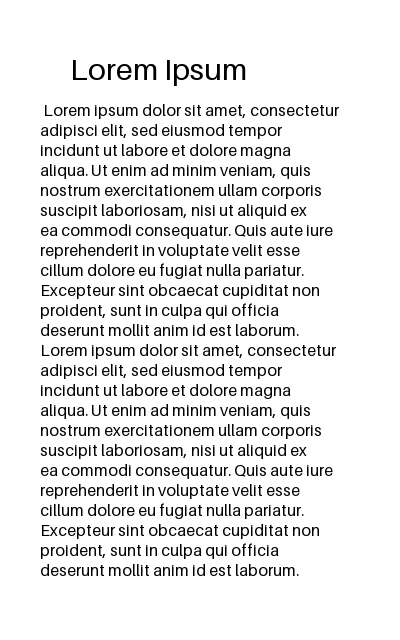

In [31]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

width, height = 400, 640
image = Image.new('L', (width, height), 'white')  # 'L'はグレースケールを意味します
draw = ImageDraw.Draw(image)

# タイトルを描画
title = "Lorem Ipsum"
font = ImageFont.load_default(size=30)
title_x, title_y = 70, 50
draw.text((title_x, title_y), title, fill="black", font=font)

# 本文を描画
dummy_text = """
Lorem ipsum dolor sit amet, consectetur adipisci elit, sed eiusmod tempor incidunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur. Quis aute iure reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint obcaecat cupiditat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
"""
dummy_text = dummy_text + dummy_text
# テキストを指定された幅で折り返す
body = textwrap.fill(dummy_text, width=40)
body
font = ImageFont.load_default(size=16)
body_x, body_y = 40, 100
draw.text((body_x, body_y), body, fill="black", font=font)

image

In [35]:
import cv2
import numpy as np

# 回転の中心を画像の中心に設定
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# 回転のための行列を生成。この例では画像を中心に90度回転
angle = 90  # 回転角度
scale = 1.0  # スケールは変更しない
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# アフィン変換を適用して画像を回転
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

rotated_image

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
image